Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


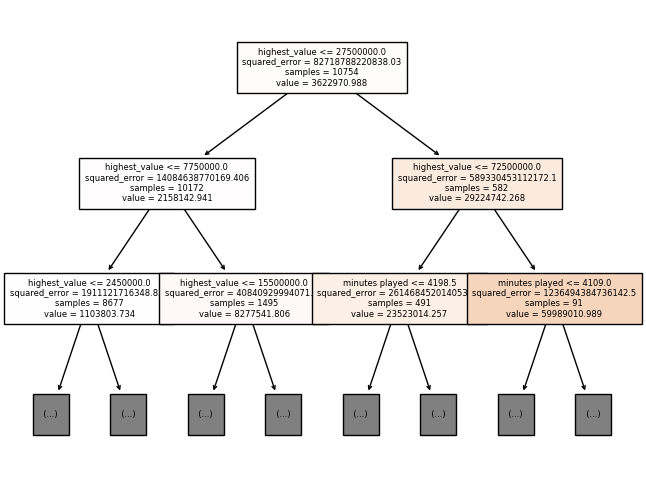

In [7]:
#import
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from google.colab import drive

#load the data
from google.colab import drive
drive.mount('/content/drive')

#read the data
dfplayers = pd.read_csv('/content/final_data.csv')

dfplayers.columns # Fixed typo here: 'colums' -> 'columns'

#determine on the target value which it will be current value of players in our case
y = dfplayers.loc[:,['current_value']]
#determine the features
X = dfplayers.loc[:,['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals', 'position_encoded']]

#view top few rows
X.head()
# describe columns using basic stats
X.describe()

#build the model
fpdecetr = DecisionTreeRegressor(random_state=1)

#fit the model
fpdecetr.fit(X, y)

#view the feature importances
fpdecetr.feature_importances_

#view the predictions
fpdecetr.predict(X)

#show the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
# Assuming 'mdlDtrplayers' is defined elsewhere, otherwise replace it with the correct variable name
plot_tree(fpdecetr, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

Now, we will make predictions for the upcoming futball players to the league rather than who have current value already.

In [8]:
print('First few players:')
print(X.head())
print('Current value predictions:')
print(fpdecetr.predict(X.head()))

First few players:
   highest_value  appearance  minutes played  award   assists     goals  \
0       70000000         104            9390     13  0.000000  0.000000   
1       22000000          15            1304      1  0.000000  0.000000   
2        6000000           4             292      4  0.000000  0.000000   
3       50000000          82            6408      9  0.056180  0.028090   
4       80000000          63            5031     21  0.017889  0.017889   

   position_encoded  
0                 1  
1                 1  
2                 1  
3                 2  
4                 2  
Current value predictions:
[15000000.  1500000.   600000. 50000000. 40000000.]


In [9]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


Evaluate the system by using mean absolute error.

In [10]:
from sklearn.metrics import mean_absolute_error
y_pred = fpdecetr.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
998.7444212404641


Use train and test data sets to build the model on training data sets and validate the model on test data sets. Generally percantages are chosen as %80 to %20.

In [11]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

Rebuild the model to evaluate test data and to observe does the MSE decrease.

In [13]:
# Rebuild model
fpdecetr_test = DecisionTreeRegressor(random_state=1)
fpdecetr_test.fit(X_train, y_train)

# Predict test data
y_test_pred = fpdecetr_test.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
1962555.632080998


In [ ]:
Improve Decision Tree Model

In [14]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mlfpdecetr = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mlfpdecetr.fit(X_trn,y_trn)
    y_tst_prd = mlfpdecetr.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [15]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 5000, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2455613.988193216
Max leaf nodes:  50 	 Mean Absolute Error:  1984542.692845262
Max leaf nodes:  500 	 Mean Absolute Error:  1976436.9428004366
Max leaf nodes:  5000 	 Mean Absolute Error:  2052481.8424532108
Max leaf nodes:  50000 	 Mean Absolute Error:  2052455.6785710028


In [17]:
from sklearn.ensemble import RandomForestRegressor

# define random forest model
mdlRfsplayers = RandomForestRegressor(random_state=1)

# fit model
mdlRfsplayers.fit(X_train, y_train)

# predict
y_test_pred = mdlRfsplayers.predict(X_test)

# evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

<ipython-input-17-3e5ce7f77cd8>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsplayers.fit(X_train, y_train)


MAE (Random Forest):
1559156.015386223


The MAE is improved.
